# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
# import sklearn

# Questions

## Data visualisation

* Use standard visualisation techniques to understand the ml.csv dataset

Load data

In [2]:
import os

# Define paths
path_root = "./"
path_data_input = "../data"

In [3]:
# data loading function
def load_data(file_name):

    # create path
    file_path = os.path.join(path_root, path_data_input, file_name)

    # Check if the file exists
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file at {file_path} does not exist.")

    try:
        # Attempt to read the csv file
        df = pd.read_csv(file_path)

        print(len(df), 'records imported')

    except Exception as e:
        # Handle exceptions that occur during the read process
        raise Exception(f"An error occurred while reading the csv file: {e}")

    return df

In [4]:
# load csv
df = load_data('ml.csv')

# create backup of original df for future reference
df_raw = df.copy()

1000 records imported


### Exploratory Data Analysis

For this part we will use a combination of tools to carry out our analysis:
* Python plots.
* The ProfileReport from ydata_profiling is a great visualisation tool for EDA purposes. We shall create the reports as html (was not possible to set up widget functionality).


Inspect df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  x11     1000 non-null   float64
 12  x12     1000 non-null   float64
 13  x13     1000 non-null   float64
 14  x14     1000 non-null   float64
 15  x15     1000 non-null   float64
 16  x16     1000 non-null   float64
 17  x17     1000 non-null   float64
 18  x18     1000 non-null   float64
 19  x19     1000 non-null   float64
 20  y       1000 non-null   int64  
dtypes: float64(20), int64(1)
memory usage:

In [6]:
df.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,0.059856,-0.613184,2.322512,0.564453,0.564453,-1.537281,0.651346,1.241025,-0.526630,-0.321259,...,4.172215,0.896425,-2.137238,-0.524706,-0.182015,-3.541982,0.627917,2.322512,1.209449,0
1,-0.583660,-1.716858,-0.536196,1.132689,1.132689,3.363117,-0.344752,-6.147045,0.387888,0.225844,...,-3.368602,1.239733,-2.328327,-2.038456,0.152063,1.474279,0.085711,-0.536196,-0.910968,0
2,0.632819,0.754014,0.548169,-3.061347,-3.061347,1.723483,-1.107925,0.843077,-1.004112,1.006515,...,2.350002,-0.509790,1.014956,-0.133556,-1.280977,2.352125,-0.905258,0.548169,-0.424693,1
3,0.666025,-1.231859,-0.615159,-0.096564,-0.096564,-2.362081,-0.926052,-3.724770,-1.291843,3.339638,...,-1.435194,0.822062,-0.863488,0.944573,-0.657542,0.061348,2.600972,-0.615159,1.216673,0
4,0.059144,-0.159858,1.185429,1.675701,1.675701,-2.002485,0.718597,1.630679,0.734710,0.517748,...,3.498812,-0.397651,1.153317,-0.866617,1.498591,0.581942,-2.246284,1.185429,3.011774,1
5,-0.684716,1.084117,-1.110104,-0.803140,-0.803140,0.563622,0.048539,1.652575,0.363770,-1.116005,...,2.244621,0.311442,-0.604701,-1.034489,-1.017733,-0.422827,-1.708372,-1.110104,1.101920,1
6,-1.144618,-0.040988,-0.060321,-0.591173,-0.591173,0.340727,-0.321371,2.666575,0.419346,1.334893,...,4.936284,0.741099,0.773230,-2.038634,-0.618990,-1.226141,-3.112429,-0.060321,2.762271,1
7,-0.032629,0.474654,-3.888860,1.223667,1.223667,-0.747921,-0.535687,1.427711,0.721268,2.545567,...,-3.063951,-2.462159,2.899687,-0.496150,2.022487,0.106811,-1.694156,-3.888860,-0.892991,1
8,-1.577806,2.585791,-2.321250,0.278962,0.278962,-0.270277,-1.566031,-1.495401,-0.744040,-1.056380,...,-3.056876,1.997500,1.155608,-0.941438,-2.190603,1.934730,0.116357,-2.321250,1.250739,1
9,-0.763947,-1.119939,-0.666927,-0.199064,-0.199064,2.345571,1.642667,-0.749073,-0.558420,1.330559,...,-2.051119,-0.730012,0.028628,0.366283,-0.524318,-0.921852,-0.078230,-0.666927,-1.728495,0


In [7]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,0.059856,-0.613184,2.322512,0.564453,0.564453,-1.537281,0.651346,1.241025,-0.526630,-0.321259,...,4.172215,0.896425,-2.137238,-0.524706,-0.182015,-3.541982,0.627917,2.322512,1.209449,0
1,-0.583660,-1.716858,-0.536196,1.132689,1.132689,3.363117,-0.344752,-6.147045,0.387888,0.225844,...,-3.368602,1.239733,-2.328327,-2.038456,0.152063,1.474279,0.085711,-0.536196,-0.910968,0
2,0.632819,0.754014,0.548169,-3.061347,-3.061347,1.723483,-1.107925,0.843077,-1.004112,1.006515,...,2.350002,-0.509790,1.014956,-0.133556,-1.280977,2.352125,-0.905258,0.548169,-0.424693,1
3,0.666025,-1.231859,-0.615159,-0.096564,-0.096564,-2.362081,-0.926052,-3.724770,-1.291843,3.339638,...,-1.435194,0.822062,-0.863488,0.944573,-0.657542,0.061348,2.600972,-0.615159,1.216673,0
4,0.059144,-0.159858,1.185429,1.675701,1.675701,-2.002485,0.718597,1.630679,0.734710,0.517748,...,3.498812,-0.397651,1.153317,-0.866617,1.498591,0.581942,-2.246284,1.185429,3.011774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.089335,-0.707953,-1.601152,3.344799,3.344799,-2.138397,-0.535857,0.765278,-0.358198,-1.660355,...,-6.017899,-0.324322,2.751492,2.023106,-0.070720,-0.159242,0.070483,-1.601152,-1.010918,0
996,0.796263,-0.544059,1.923068,-1.213895,-1.213895,-4.863790,0.970886,1.883344,0.936753,2.859356,...,2.827478,0.166317,1.350942,0.878975,-0.583111,-1.696265,1.597607,1.923068,-2.144857,0
997,0.006266,0.677183,1.111781,-0.392983,-0.392983,0.757790,-0.678159,2.550552,1.084215,2.059497,...,7.076757,-1.113223,-1.856685,-0.884620,0.804411,-0.729983,-4.613538,1.111781,-1.170473,1
998,-0.598648,-1.018163,-0.892881,3.886200,3.886200,0.531769,1.616102,-3.609442,0.030014,-3.064055,...,-6.795032,-0.222822,0.350625,2.252174,-0.596400,-0.230354,-0.547367,-0.892881,2.406903,1


In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="ML_csv", explorative=True)

# Create Report
profile.to_file("../reports/ml_csv.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<?, ?it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# gather stronger correlations
import numpy as np

def get_strong_correlations(df, columns, threshold=0.5):
    df_selected = df[columns]

    # Get Pearson correlation matrix
    pearson_corr = df_selected.corr(method='pearson').reset_index().melt(id_vars='index')
    pearson_corr.columns = ['Column 1', 'Column 2', 'Pearson']

    # Get Spearman correlation matrix
    spearman_corr = df_selected.corr(method='spearman').reset_index().melt(id_vars='index')
    spearman_corr.columns = ['Column 1', 'Column 2', 'Spearman']

    # Merge Pearson and Spearman correlations
    merged_corr = pd.merge(
        pearson_corr,
        spearman_corr,
        on=['Column 1', 'Column 2']
    )

    # Filter correlations (either Pearson or Spearman above threshold, excluding same-column pairs)
    strong_corrs = merged_corr[
        ((np.abs(merged_corr['Pearson']) >= threshold) | (np.abs(merged_corr['Spearman']) >= threshold)) &
        (merged_corr['Column 1'] != merged_corr['Column 2'])
        ].copy()

    # Remove symmetrical duplicates
    strong_corrs['Sorted Pair'] = strong_corrs[['Column 1', 'Column 2']].apply(lambda x: ' & '.join(sorted(x)), axis=1)
    strong_corrs = strong_corrs.drop_duplicates(subset='Sorted Pair').drop(columns='Sorted Pair')

    # Sort by maximum absolute correlation (between Pearson and Spearman)
    strong_corrs['max_corr'] = strong_corrs[['Pearson', 'Spearman']].abs().max(axis=1)
    strong_corrs = strong_corrs.sort_values(by='max_corr', ascending=False).drop(columns='max_corr').reset_index(
        drop=True)

    return strong_corrs


In [10]:
# Get moderate-strong correlations (50% or above)
strong_corr_results = get_strong_correlations(df, df.columns , threshold=0.5)

# Display results
strong_corr_results

,Column 1,Column 2,Pearson,Spearman
0,x18,x2,1.000000,1.000000
1,x4,x3,1.000000,1.000000
2,x10,x5,0.619836,0.630867
3,x13,x11,-0.565574,-0.526175
4,x10,x3,-0.556873,-0.538729
5,x10,x4,-0.556873,-0.538729


Using matplotlib backend: module://matplotlib_inline.backend_inline


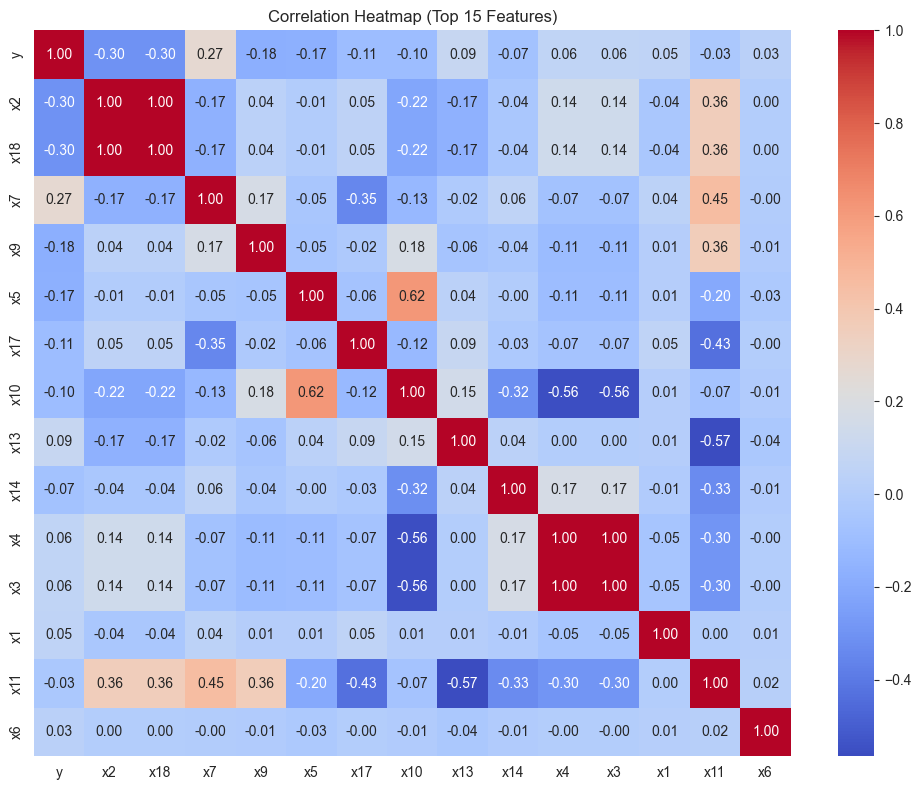

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib to use an interactive backend
%matplotlib

# Correlation heatmap of top 15 features by |corr with y|
top_corr = df.corr()['y'].abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Top 15 Features)")
plt.tight_layout()
plt.show()

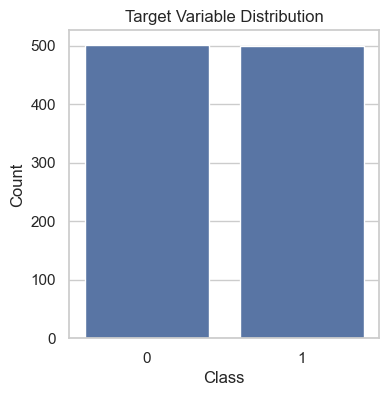

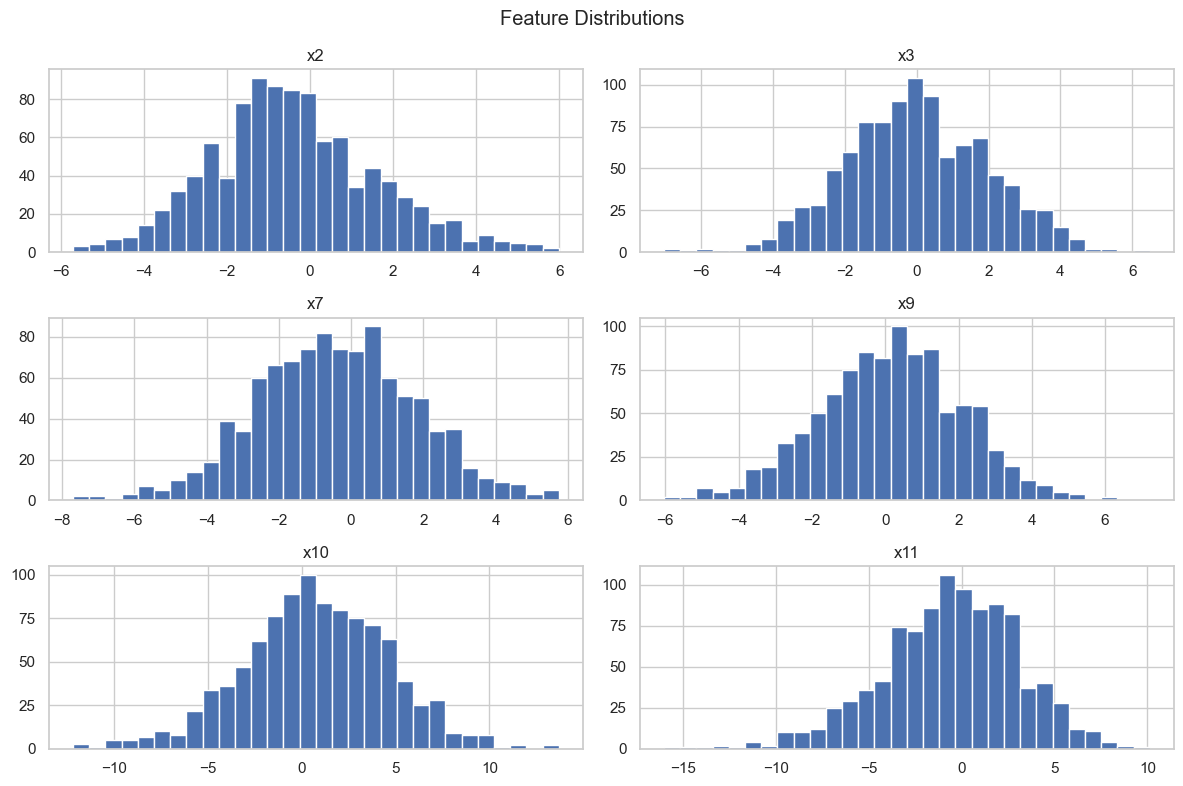

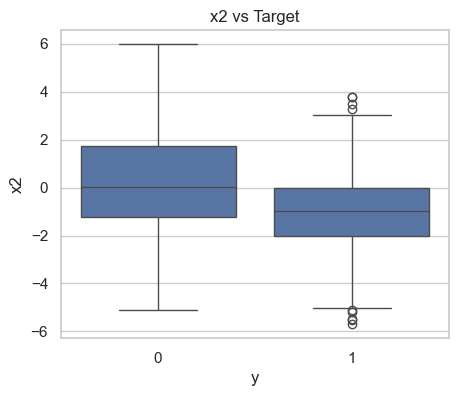

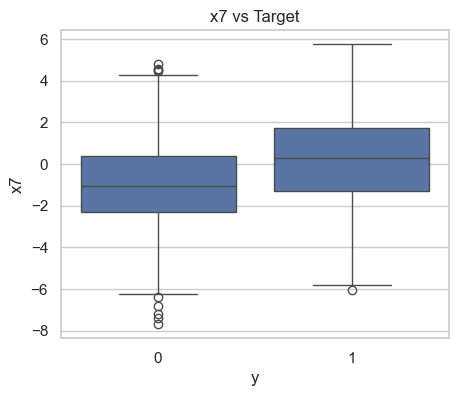

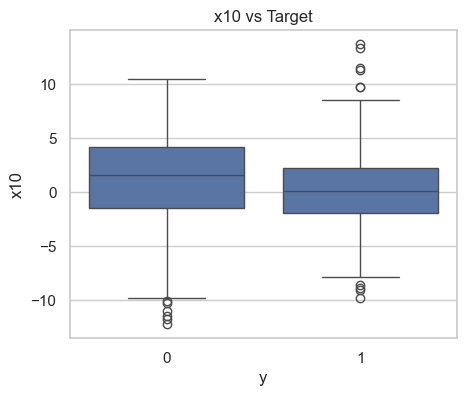

In [12]:
# Ensure consistent style
sns.set(style="whitegrid")

# 1. Target variable distribution
plt.figure(figsize=(4, 4))
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 2. Histograms of selected features
top_hist_features = ["x2", "x3", "x7", "x9", "x10", "x11"]
df[top_hist_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# 3. Boxplots of top features vs. target
top_box_features = ["x2", "x7", "x10"]
for col in top_box_features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"{col} vs Target")
    plt.show()



## Initial Findings

Based on the initial exploration of the dataset, here are the key findings:

### Data Quality Checks

* **Missing Values:** No missing values were found in any column of the dataset. This eliminates the need for imputation.
* **Duplicate Rows:** No fully duplicated rows were found.
* **Conclusion:** The dataset is clean with respect to missing data and duplicates.

### Correlation Analysis

A correlation matrix was computed for the numerical features. Notable observations:

* **Perfect Correlation (Redundancy):**
    * `x2` and `x18`: correlation = 1.0
    * `x3` and `x4`: correlation = 1.0
    * **Implication:** These columns are likely duplicates or derived from the same inputs. While tree-based models (e.g., Random Forest) can handle multicollinearity, redundant features may reduce interpretability and stability of feature importance. We’ll drop `x18` and `x4`.

### Feature Distributions and Class Separation

Feature distributions appear fairly symmetric with no obvious strong outliers.
Sample features such as `x2`, `x7`, and `x10` show mild but consistent differences in distribution across the two classes of the target variable. This suggests potential predictive value, particularly for tree-based models that can naturally capture such non-linear separations.

### Target Variable Balance

The target variable `y` is nearly perfectly balanced, with 501 instances of class 0 and 499 of class 1. As a result, no resampling or class weighting is needed. Standard classification metrics such as accuracy, F1 score, and ROC AUC will be appropriate for evaluation.


### Summary & Next Steps

1. The dataset is structurally clean.
2. Redundant features (`x18`, `x4`) will be removed.
3. The target variable is balanced — no class imbalance techniques are required.
4. No domain knowledge is available, which limits meaningful feature engineering. Creating derived features without understanding their semantics may introduce noise. Instead,  it is preferred to rely on data-driven feature selection techniques (e.g., correlation pruning, tree-based importance, recursive elimination).

## Machine learning

* Establish a reliable roc_auc metric for this data set using a cross validation technique to predict y from x using a random forest.


### Modeling Workflow

1. **Feature Preparation:**
   Drop perfectly correlated features (`x18`, `x4`) to reduce redundancy.

2. **Define Target and Predictors:**
   Use all remaining features to predict the binary target `y`.

3. **Model Selection:**
   Train a Random Forest classifier — a robust, non-linear model well-suited for this dataset.

4. **Cross-Validation Setup:**
   Apply 5-fold stratified cross-validation to ensure consistent class balance across folds.

5. **Hyperparameter Tuning:**
   Use randomized search to explore a range of Random Forest settings, optimizing for ROC AUC.

6. **Performance Reporting:**
   Report the best cross-validated ROC AUC score and the corresponding hyperparameter configuration.

> **Note:** No train-test split is applied. Instead, model performance is evaluated using cross-validation, which provides a robust estimate of generalization performance for this assignment context.


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

# 1. Prepare data
X = df.drop(columns=['y', 'x18', 'x4'])  # Drop redundant features
y = df['y']

# 2. Define hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# 3. Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize model and search
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    scoring='roc_auc',
    cv=cv,
    n_iter=20,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 5. Run search and report
search.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C210FCFF90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C20DA568D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C20F2A7650>},
                   random_state=42, scoring='roc_auc', verbose=1)

In [14]:
# Extract ROC AUC scores for each fold
cv_scores = search.cv_results_['mean_test_score'][search.best_index_]
std_scores = search.cv_results_['std_test_score'][search.best_index_]

# Report
print(f"Best ROC AUC (CV Mean): {cv_scores:.4f}")
print(f"ROC AUC Std Dev: {std_scores:.4f}")
print("Best Parameters:", search.best_params_)


Best ROC AUC (CV Mean): 0.8840
ROC AUC Std Dev: 0.0094
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 291}


## Bonus

* How would you verify the model has has established which features are important and those that are not.

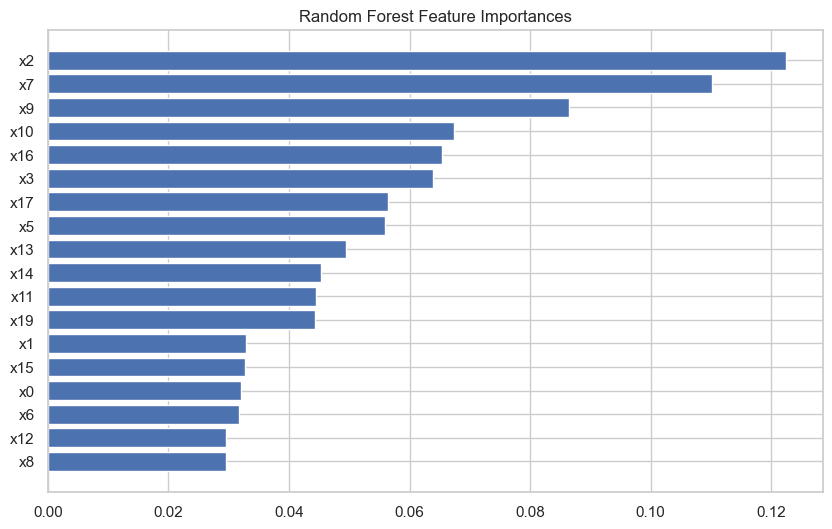

In [15]:
# Fit the best model on full data
final_rf = RandomForestClassifier(**search.best_params_, random_state=42, n_jobs=-1)
final_rf.fit(X, y)

# Extract and plot feature importances
importances = final_rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot top N
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()

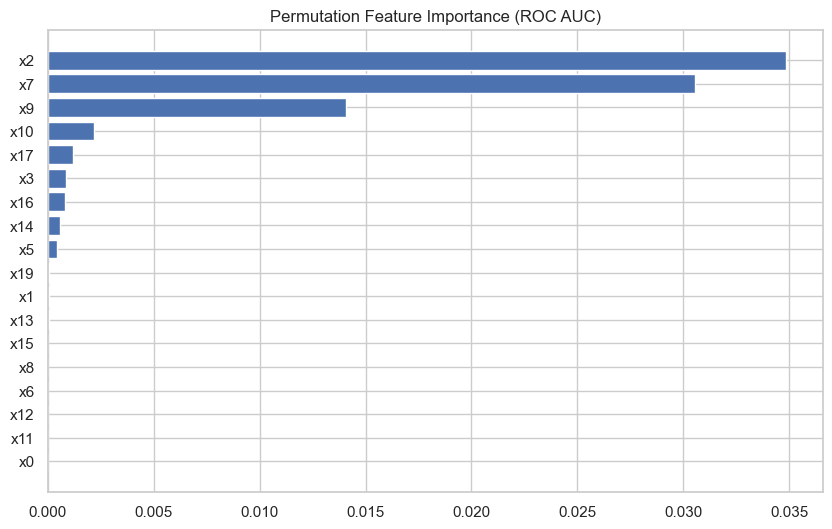

In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(final_rf, X, y, n_repeats=10, random_state=42, scoring='roc_auc')
perm_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
perm_df = perm_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'], perm_df['Importance'])
plt.title("Permutation Feature Importance (ROC AUC)")
plt.gca().invert_yaxis()
plt.show()


### Feature Importance Evaluation Summary

To verify that the model has correctly identified the most influential features, two complementary importance measures were computed:

1. **Random Forest Feature Importances (Gini-based):**
   This reflects how often each feature is used for splitting across all trees. Features `x2`, `x7`, and `x9` emerged as the most influential.

2. **Permutation Importance (based on ROC AUC drop):**
   This measures the actual decrease in predictive performance when each feature is randomly shuffled. It confirms that `x2` and `x7` are the key drivers of model accuracy.

> **Additionally**, SHAP values can be calculated as a follow-up to provide a more granular, model-agnostic explanation of feature contributions across individual predictions. This allows for deeper interpretability and validation of the model’s behavior.
